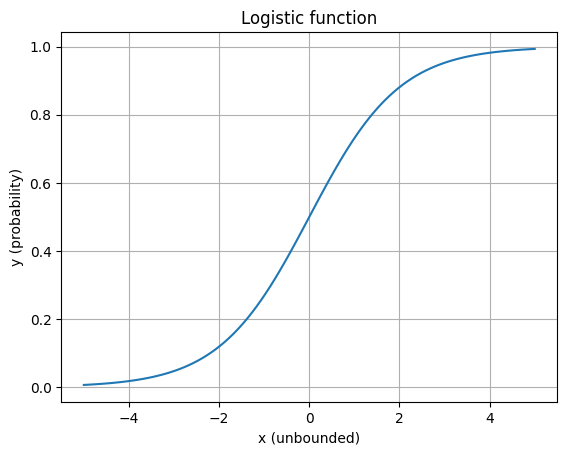

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y)
plt.xlabel('x (unbounded)')
plt.ylabel('y (probability)')
plt.title('Logistic function')
plt.grid()

plt.show()

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

df = pd.read_csv('stroke_v1.csv', sep=',')
df

,ID,Weight,Smoking,Exercise,Cholesterol,Income,Exphappiness,Birthyear,Sex,Stroke
0,1,117,1,2,8.0,1080,27,1913,M,1
1,2,62,0,8,5.5,2120,55,1949,M,0
2,3,74,0,6,4.8,3170,65,1976,M,0
3,4,77,0,5,4.2,4740,61,1973,F,0
4,5,67,0,8,4.5,1900,53,1929,M,0
...,...,...,...,...,...,...,...,...,...,...
995,996,61,0,3,6.5,3360,42,1988,F,0
996,997,101,0,5,4.8,3050,36,1955,M,1
997,998,90,0,3,7.0,3450,46,1963,F,0
998,999,99,0,2,6.2,1650,33,1974,F,1


In [4]:
df['Sex'] = df['Sex'].map({'M': 1, 'F': 2}).astype('int64')

df.drop('ID', axis=1, inplace=True)

for col in df.columns.values[:-1]:
    if df[col].dtype != 'float64':
        df[col] = df[col].astype(dtype='float64')

df.head(10)

,Weight,Smoking,Exercise,Cholesterol,Income,Exphappiness,Birthyear,Sex,Stroke
0,117.0,1.0,2.0,8.0,1080.0,27.0,1913.0,1.0,1
1,62.0,0.0,8.0,5.5,2120.0,55.0,1949.0,1.0,0
2,74.0,0.0,6.0,4.8,3170.0,65.0,1976.0,1.0,0
3,77.0,0.0,5.0,4.2,4740.0,61.0,1973.0,2.0,0
4,67.0,0.0,8.0,4.5,1900.0,53.0,1929.0,1.0,0
5,76.0,0.0,6.0,6.2,3410.0,72.0,1959.0,2.0,0
6,63.0,0.0,7.0,4.1,3640.0,71.0,1979.0,2.0,0
7,75.0,0.0,5.0,5.2,2500.0,99.0,1960.0,2.0,0
8,70.0,0.0,6.0,4.9,2110.0,48.0,1922.0,2.0,0
9,82.0,0.0,5.0,5.8,2560.0,34.0,2007.0,2.0,1


In [5]:
X, y = df.iloc[:,:8], df.iloc[:,8]

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head(10)

,Weight,Smoking,Exercise,Cholesterol,Income,Exphappiness,Birthyear,Sex
0,2.745321,1.866629,-1.621745,1.785293,-1.581660,-1.430214,-2.020743,-0.988071
1,-1.202406,-0.535725,1.497996,-0.120768,-0.640621,0.236702,-0.317710,-0.988071
2,-0.341084,-0.535725,0.458082,-0.654465,0.309466,0.832029,0.959564,-0.988071
3,-0.125753,-0.535725,-0.061875,-1.111920,1.730073,0.593899,0.817645,1.012073
4,-0.843522,-0.535725,1.497996,-0.883192,-0.839687,0.117637,-1.263839,-0.988071
5,-0.197530,-0.535725,0.458082,0.412929,0.526629,1.248759,0.155354,1.012073
6,-1.130629,-0.535725,0.978039,-1.188162,0.734743,1.189226,1.101484,1.012073
7,-0.269307,-0.535725,-0.061875,-0.349495,-0.296780,2.856142,0.202661,1.012073
8,-0.628191,-0.535725,0.458082,-0.578223,-0.649670,-0.180027,-1.594984,1.012073
9,0.233131,-0.535725,-0.061875,0.107959,-0.242489,-1.013485,2.426064,1.012073


In [6]:
reg = LogisticRegression(solver='lbfgs')
reg.fit(X, y)

print('Coefficients: ', reg.coef_)
print('Intercept: ', reg.intercept_)

Coefficients:  [[ 1.00440714  0.16707594 -0.49086543  0.30697732 -0.04086465 -0.01986069
   0.15470113 -0.04488196]]
Intercept:  [-0.57794563]


Accuracy: 0.76
Confusion Matrix:
 [[512  88]
 [148 252]]


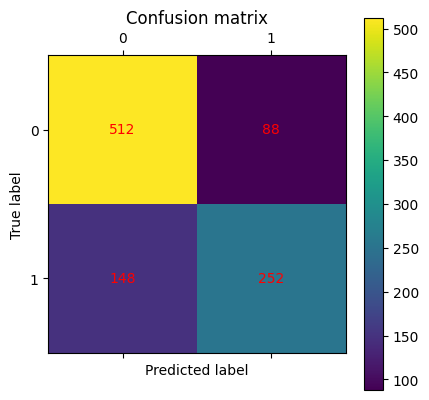

In [7]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

y_pred = cross_val_predict(estimator=reg, X=X, y=y, cv=10)

cm = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)

print('Accuracy: %0.2f' % accuracy)
print('Confusion Matrix:\n', cm)

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
features=['Weight', 'Smoking', 'Exercise', 'Cholesterol', 'Income', 'Exhappiness', 'Birthyear', 'Sex']

Xi = pd.DataFrame(columns=features)


for f in features:
    val = input(f'Enter value for feature: {f}')
    Xi[f] = [float(val)]

Xi = pd.DataFrame(scaler.transform(Xi), columns=Xi.columns)
p = reg.predict_proba(Xi)[:,1]

print('Probability of stroke: %0.2f' % p[0])

In [20]:
Xi = X.iloc[:10]              # первые 10 человек

Xi_scaled = scaler.transform(Xi)

p = reg.predict_proba(Xi_scaled)[:, 1]

results = Xi.copy()
results['Probability_of_Stroke'] = p

results['Probability_of_Stroke'] = results['Probability_of_Stroke'].round(9)

display(results)


C:\Users\onion\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,Weight,Smoking,Exercise,Cholesterol,Income,Exphappiness,Birthyear,Sex,Probability_of_Stroke
0,2.745321,1.866629,-1.621745,1.785293,-1.581660,-1.430214,-2.020743,-0.988071,9.000000e-09
1,-1.202406,-0.535725,1.497996,-0.120768,-0.640621,0.236702,-0.317710,-0.988071,1.000000e-09
2,-0.341084,-0.535725,0.458082,-0.654465,0.309466,0.832029,0.959564,-0.988071,1.000000e-09
3,-0.125753,-0.535725,-0.061875,-1.111920,1.730073,0.593899,0.817645,1.012073,1.000000e-09
4,-0.843522,-0.535725,1.497996,-0.883192,-0.839687,0.117637,-1.263839,-0.988071,1.000000e-09
5,-0.197530,-0.535725,0.458082,0.412929,0.526629,1.248759,0.155354,1.012073,1.000000e-09
6,-1.130629,-0.535725,0.978039,-1.188162,0.734743,1.189226,1.101484,1.012073,1.000000e-09
7,-0.269307,-0.535725,-0.061875,-0.349495,-0.296780,2.856142,0.202661,1.012073,1.000000e-09
8,-0.628191,-0.535725,0.458082,-0.578223,-0.649670,-0.180027,-1.594984,1.012073,1.000000e-09
9,0.233131,-0.535725,-0.061875,0.107959,-0.242489,-1.013485,2.426064,1.012073,1.000000e-09


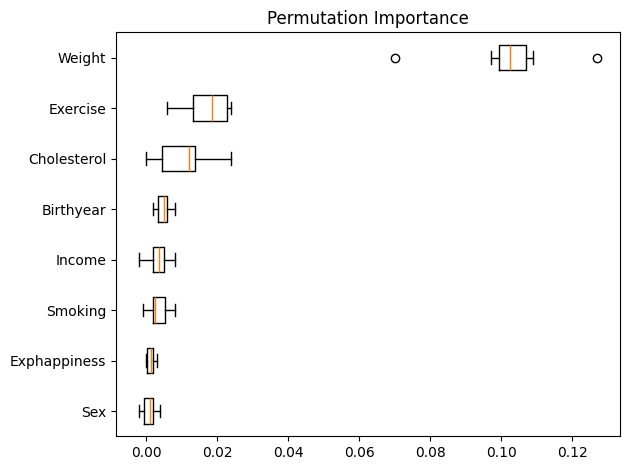

In [21]:
from sklearn.inspection import permutation_importance

result = permutation_importance(reg, X, y, n_repeats=10, scoring='accuracy', random_state=0, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, tick_labels=X.columns[sorted_idx])
ax.set_title('Permutation Importance')
fig.tight_layout()
plt.show()